In [1]:
import sys
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams
matplotlib.rcdefaults()
plt.rcParams['mathtext.fontset'] = "cm"


%load_ext autoreload
%autoreload 1
sys.path.append("../functions")
%aimport general_functions
%aimport force
function_derivatives = force.model_derivatives

#Check Python version
print(sys.version)

3.9.15 (main, Nov 24 2022, 14:39:17) [MSC v.1916 64 bit (AMD64)]


## Model simulation: Force balance of an harmonic oscillator

We represent the model through a state space representation of the system:

$$\dot{x_1}=\frac{dx_1}{dt}= x_2$$

$$\dot{x_2}=\frac{dx_2}{dt}= -\frac{b}{m}x_2 -\frac{k}{m}x_1 + \frac{F_{ex}}{m}$$

with $x_1=x, x_2=\frac{dx}{dt}$

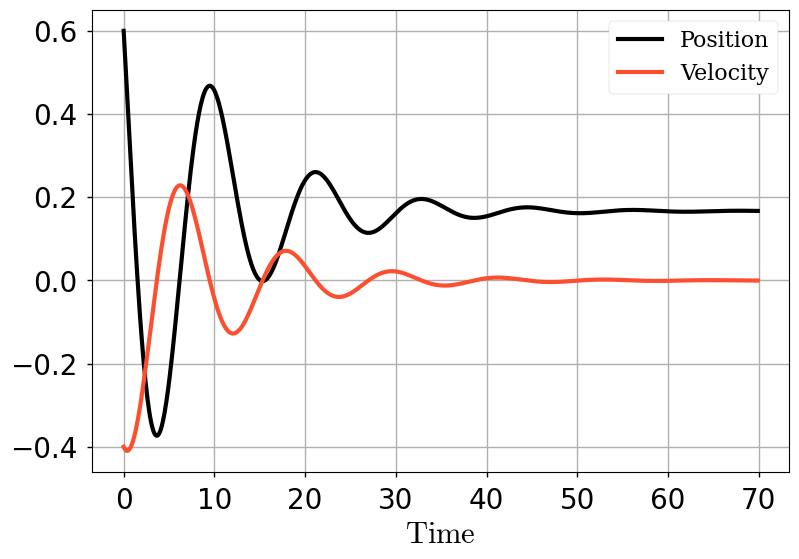

In [2]:
# Parameters
F_ex = 0.05
m = 1
b = 0.2
k = 0.3

df = general_functions.model(
    np.arange(0, 70, 0.1), # Timesteps
    [0.6, -0.4], # Initial conditions
    ['Position','Velocity'], # Variable names
   function_derivatives, # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    b=b, m=m, k=k, Fex=F_ex)

plt.show()

## Implementation of the Harmonic oscillator model 

We will now manually implement the ODE system and compare it to the one that we use when we import ```functions/force```.

$$\dot{x_1}=\frac{dx_1}{dt}= x_2$$

$$\dot{x_2}=\frac{dx_2}{dt}= -\frac{b}{m}x_2 -\frac{k}{m}x_1 + \frac{F_{ex}}{m}$$

with $x_1=x, x_2=\frac{dx}{dt}$

In [3]:
# Python library to solve ODEs (and many more things!)
from scipy.integrate import odeint

# We define our model and we simultaneously solve it
def solve_harmonic_model(t,x,m,b,k,F_ex,init):
    def model(x,t):
        '''
        Differential equation
        '''
        Vel = x[0]
        Pos = x[1]
        dPosdt = Vel
        dVeldt = -b/m*Vel - k/m*Pos + F_ex/m

        return [dVeldt,dPosdt]

    # We solve the system by providing the model, the initial conditions, and the time array
    y=odeint(model,init,t)
    
    return y

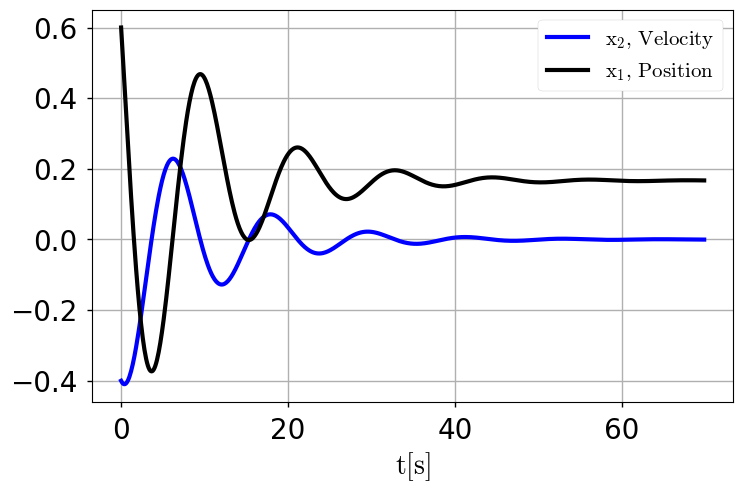

In [5]:
# We provide the variables 
Vel_init = -0.4
Pos_init = 0.6

# Parameters
F_ex = 0.05
m = 1
b = 0.2
k = 0.3

# Python list to be provided for the scipy solver
init = [Vel_init,Pos_init]

# We define the time array with the start, final, and time step for the scipy integrator
t_final = 70
time = np.arange(0,t_final,0.1)

# We solve the system
y = solve_harmonic_model(time,init,m,b,k,F_ex,init)

# We store the solution
Vel = y[:,0]
Pos = y[:,1]

# We plot the solution
fig = plt.figure(figsize=(7.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)

ax1 = fig.add_subplot(111)
ax1.plot(time,Vel,'b-',label = r'$\mathrm{x_2,\/Velocity}$')
ax1.plot(time,Pos,'k-',label = r'$\mathrm{x_1,\/Position}$')

#ax1.plot(df.index,df['Velocity'],'r--',label = r'$\mathrm{Velocity,functions/force}$')
#ax1.plot(df.index,df['Position'],'g--',label = r'$\mathrm{Position,functions/force}$')

ax1.legend(loc=1,fontsize=15,framealpha=1)
#ax1.set_ylabel(r'$\mathrm{[-]}$', fontsize=20)
ax1.set_xlabel(r'$\mathrm{t[s]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
ax1.grid(True)
#plt.minorticks_on()

plt.show()

In [6]:
# Operating Point of the system
OP = [0,F_ex/k]

# Second trajectory
init = [0.5,-0.4]
y2 = solve_harmonic_model(time,init,m,b,k,F_ex,init)
# We store the solution
Vel2 = y2[:,0]
Pos2 = y2[:,1]

# Evaluate derivatives for quiver plot
Pos_lims = np.array([-0.5,0.85])
Vel_lims = np.array([-0.6,0.8])
Pos_arr = np.linspace(Pos_lims[0],Pos_lims[1],num=21)
Vel_arr = np.linspace(Vel_lims[0],Vel_lims[1],num=21)

# We define this function just to calculate the derivatives
def harmonic_model(x,m,b,k,F_ex):
    '''
    Differential equation
    '''
    Vel = x[0]
    Pos = x[1]
    dPosdt = Vel
    dVeldt = -b/m*Vel - k/m*Pos + F_ex/m

    return [dVeldt,dPosdt]

Vel_q,Pos_q = np.meshgrid(Vel_arr,Pos_arr)
dVeldt_q,dPosdt_q = harmonic_model([Vel_q,Pos_q],m,b,k,F_ex)
# Normalisation
M = (np.hypot(dVeldt_q, dPosdt_q))
M[ M == 0] = 1.
dVeldt_q = dVeldt_q/M
dPosdt_q = dPosdt_q/M

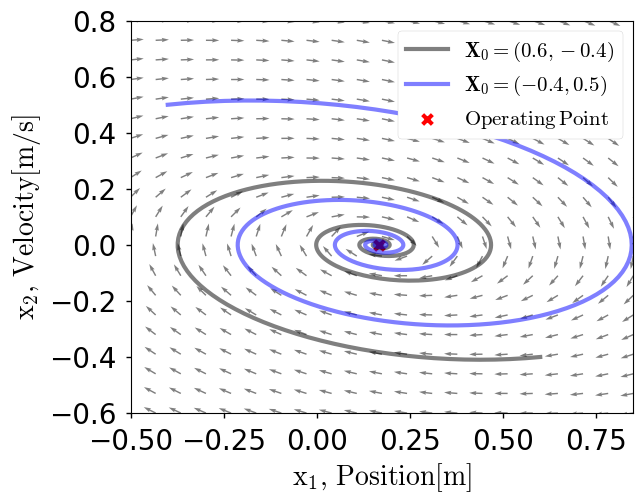

In [7]:
# We plot the solution
fig = plt.figure(figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)

ax1 = fig.add_subplot(111)

ax1.plot(Pos,Vel,'k-',label = r'$\mathrm{\mathbf{X}_0 = (0.6,-0.4)}$',alpha=0.5)
ax1.plot(Pos2,Vel2,'b-',label = r'$\mathrm{\mathbf{X}_0 = (-0.4,0.5)}$',alpha=0.5)

ax1.scatter([OP[1]],[OP[0]],c='r',marker='x',label = r'$\mathrm{Operating\/Point}$',alpha=1)

ax1.quiver(Pos_q,Vel_q,dPosdt_q,dVeldt_q,alpha=0.5)

ax1.legend(loc=1,fontsize=15,framealpha=1)
ax1.set_xlabel(r'$\mathrm{x_1,\/Position [m]}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{x_2,\/Velocity [m/s]}$', fontsize=20,rotation=90)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
ax1.set_xlim(Pos_lims[0],Pos_lims[1])
ax1.set_ylim(Vel_lims[0],Vel_lims[1])
ax1.grid(False)
#plt.minorticks_on()
#plt.gca().set_aspect('equal')
plt.show()

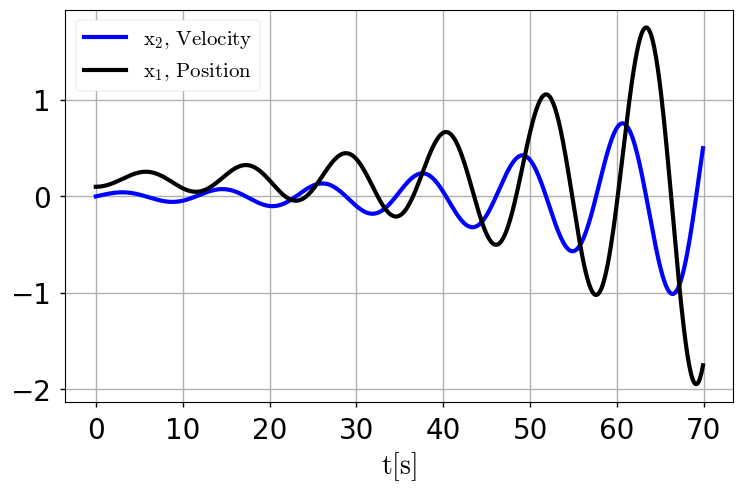

In [8]:
# We provide the variables 
Vel_init = 0
Pos_init = 0.1

# Parameters
F_ex = 0.05
m = 1
b = -0.1
k = 0.3

# Python list to be provided for the scipy solver
init = [Vel_init,Pos_init]

# We define the time array with the start, final, and time step for the scipy integrator
t_final = 70
time = np.arange(0,t_final,0.1)

# We solve the system
y = solve_harmonic_model(time,init,m,b,k,F_ex,init)

# We store the solution
Vel = y[:,0]
Pos = y[:,1]

# We plot the solution
fig = plt.figure(figsize=(7.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)

ax1 = fig.add_subplot(111)
ax1.plot(time,Vel,'b-',label = r'$\mathrm{x_2,\/Velocity}$')
ax1.plot(time,Pos,'k-',label = r'$\mathrm{x_1,\/Position}$')

#ax1.plot(df.index,df['Velocity'],'r--',label = r'$\mathrm{Velocity,functions/force}$')
#ax1.plot(df.index,df['Position'],'g--',label = r'$\mathrm{Position,functions/force}$')

ax1.legend(loc=2,fontsize=15,framealpha=1)
#ax1.set_ylabel(r'$\mathrm{[-]}$', fontsize=20)
ax1.set_xlabel(r'$\mathrm{t[s]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
ax1.grid(True)
#plt.minorticks_on()
plt.show()

In [9]:
# Operating Point of the system
OP = [0,F_ex/k]

# Second trajectory
init = [-0.4,0.5]
y2 = solve_harmonic_model(time,init,m,b,k,F_ex,init)
# We store the solution
Vel2 = y2[:,0]
Pos2 = y2[:,1]

# Evaluate derivatives for quiver plot
Pos_lims = np.array([-0.5,0.85])
Vel_lims = np.array([-0.6,0.8])
Pos_arr = np.linspace(Pos_lims[0],Pos_lims[1],num=21)
Vel_arr = np.linspace(Vel_lims[0],Vel_lims[1],num=21)

Vel_q,Pos_q = np.meshgrid(Vel_arr,Pos_arr)
dVeldt_q,dPosdt_q = harmonic_model([Vel_q,Pos_q],m,b,k,F_ex)
# Normalisation
M = (np.hypot(dVeldt_q, dPosdt_q))
M[ M == 0] = 1.
dVeldt_q = dVeldt_q/M
dPosdt_q = dPosdt_q/M

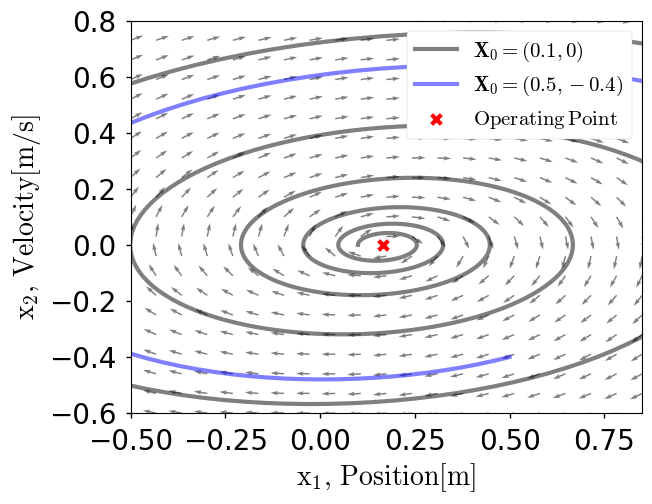

In [10]:
# We plot the solution
fig = plt.figure(figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)

ax1 = fig.add_subplot(111)

ax1.plot(Pos,Vel,'k-',label = r'$\mathrm{\mathbf{X}_0 = (0.1,0)}$',alpha=0.5)
ax1.plot(Pos2,Vel2,'b-',label = r'$\mathrm{\mathbf{X}_0 = (0.5,-0.4)}$',alpha=0.5)

ax1.scatter([OP[1]],[OP[0]],c='r',marker='x',label = r'$\mathrm{Operating\/Point}$',alpha=1)

ax1.quiver(Pos_q,Vel_q,dPosdt_q,dVeldt_q,alpha=0.5)

ax1.legend(loc=1,fontsize=15,framealpha=1)
ax1.set_xlabel(r'$\mathrm{x_1,\/Position [m]}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{x_2,\/Velocity [m/s]}$', fontsize=20,rotation=90)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
ax1.set_xlim(Pos_lims[0],Pos_lims[1])
ax1.set_ylim(Vel_lims[0],Vel_lims[1])
ax1.grid(False)
#plt.minorticks_on()
#plt.gca().set_aspect('equal')
plt.show()